In [ ]:
# Code 3lshan anzl dataset mn 3la kaggle, bs bl net bta3 collab
# el dataset htefdal 3la collab, msh htb2a 3l computer 3ndy
# dh el link bta3 el shar7
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# el credentials mnzlha fy internships ---> samsung innovation campus

In [ ]:
# 1. Install the Kaggle library
#! pip install kaggle

In [1]:
# 2. Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [2]:
# 3. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [3]:
# 4. Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Downloading the dataset
! kaggle datasets download neisse/scrapped-lyrics-from-6-genres

 80% 61.0M/75.8M [00:00<00:00, 59.4MB/s]
100% 75.8M/75.8M [00:00<00:00, 104MB/s] 


In [5]:
# Unzipping the dataset
! unzip scrapped-lyrics-from-6-genres

Archive:  scrapped-lyrics-from-6-genres.zip
  inflating: artists-data.csv        
  inflating: lyrics-data.csv         


In [6]:
# Now, we are ready to start

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string, os 
import tensorflow as tf

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional 
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# csv file
df = pd.read_csv('../content/lyrics-data.csv')

# EDA & Data Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209522 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   209522 non-null  object
 1   SName   209522 non-null  object
 2   SLink   209522 non-null  object
 3   Lyric   209484 non-null  object
 4   Idiom   206375 non-null  object
dtypes: object(5)
memory usage: 8.0+ MB


In [ ]:
# first five rows, and last five rows
df.head(-5)

,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...,...,...,...
209512,/zeca-pagodinho/,Verdade,/zeca-pagodinho/verdade-1.html,Descobri que te amo demais. Descobri em você m...,PORTUGUESE
209513,/zeca-pagodinho/,Vida da Gente,/zeca-pagodinho/vida-da-gente.html,O galo canta e a nega me beija. Marmita tá pro...,PORTUGUESE
209514,/zeca-pagodinho/,Vida da Minha Vida,/zeca-pagodinho/vida-da-minha-vida.html,Vida da minha vida. Lua que encandiou. Uma can...,PORTUGUESE
209515,/zeca-pagodinho/,Vivo Isolado do Mundo,/zeca-pagodinho/vivo-isolado-do-mundo.html,"Eu vivia,......isolado do mundo. Quando eu era...",PORTUGUESE


In [ ]:
df.isnull().sum()
# Idiom has 3k+ nulls

ALink       0
SName       0
SLink       0
Lyric      38
Idiom    3147
dtype: int64

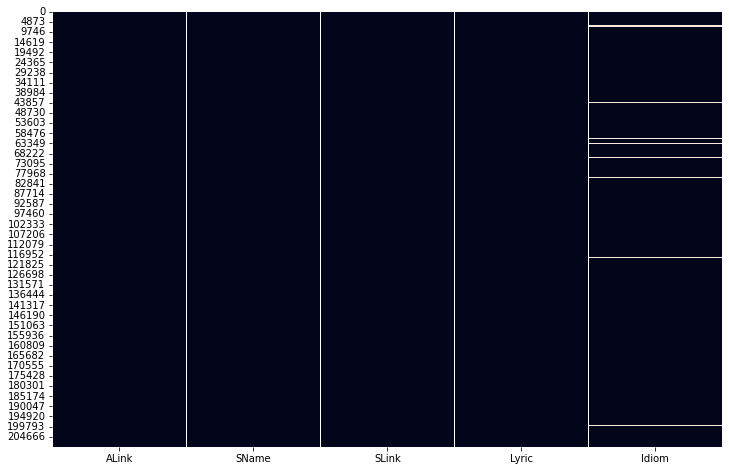

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar = False)
# It is clear that dropping nulls will
# have minimal effect on the accuracy of the data

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum().sum()
# No more null values

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206375 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   206375 non-null  object
 1   SName   206375 non-null  object
 2   SLink   206375 non-null  object
 3   Lyric   206375 non-null  object
 4   Idiom   206375 non-null  object
dtypes: object(5)
memory usage: 9.4+ MB


In [ ]:
# value count of song languages
df['Idiom'].value_counts()
# We notice there are some Arabic songs

ENGLISH           114723
PORTUGUESE         85085
SPANISH             4812
ITALIAN              626
FRENCH               471
GERMAN               314
KINYARWANDA           88
ICELANDIC             47
SWEDISH               27
FINNISH               24
INDONESIAN            17
GALICIAN              12
ESTONIAN              12
HAITIAN_CREOLE         9
IRISH                  9
DANISH                 9
BASQUE                 8
NORWEGIAN              7
TAGALOG                7
CROATIAN               7
CATALAN                6
SUNDANESE              6
SWAHILI                5
DUTCH                  5
RUSSIAN                4
MALAY                  4
SERBIAN                3
NYANJA                 2
SESOTHO                2
CEBUANO                2
TURKISH                2
JAPANESE               2
KURDISH                2
ARABIC                 2
MALAGASY               2
SLOVAK                 1
WELSH                  1
KOREAN                 1
SLOVENIAN              1
BOSNIAN                1


In [ ]:
# Checking the arabic songs
df[df['Idiom']=='ARABIC']

,ALink,SName,SLink,Lyric,Idiom
116147,/enrique-iglesias/,Nos Fuimos Lejos (Arabic Version) (Ft. Desceme...,/enrique-iglesias/nos-fuimos-lejos-arabic-vers...,حاتم عمور. تيرارا رارا. Nos Fuimos Lejos. يا ل...,ARABIC
116269,/enrique-iglesias/,Nos Fuimos Lejos (Arabic Version) (Ft. Desceme...,/enrique-iglesias/nos-fuimos-lejos-arabic-vers...,حاتم عمور. تيرارا رارا. Nos Fuimos Lejos. يا ل...,ARABIC


In [ ]:
# value count of author link
df['ALink'].value_counts()

/chris-brown/                 1176
/elvis-presley/                782
/glee/                         715
/akon/                         658
/lil-wayne/                    646
                              ... 
/teffy-angel/                    1
/trezalt/                        1
/crispim/                        1
/claudio-barulho/                1
/victor-hugo-e-alessandra/       1
Name: ALink, Length: 2989, dtype: int64

In [ ]:
# value count of song names
df['SName'].value_counts()

Intro                       70
Saudade                     69
Home                        61
Angel                       59
Hold On                     53
                            ..
She Wanna Fuck               1
Spinning Over The Island     1
Break Them                   1
Give Me Another Chance       1
Real Real Gone               1
Name: SName, Length: 125969, dtype: int64

In [ ]:
# value count of song names
df['SLink'].value_counts()

/m-i-a/bad-girls.html                             6
/m-i-a/foreign-friend.html                        6
/m-i-a/can-see-can-do.html                        6
/m-i-a/sexodus-feat-the-weeknd.html               6
/m-i-a/bring-the-noize.html                       6
                                                 ..
/afirmativa/aperto-de-mao.html                    1
/valdem-mc-sobrevivente-da-fe/lagrimas.html       1
/electronic/for-you.html                          1
/luiz-henrique-e-fernando/porre-de-paixao.html    1
/alcione/retratacao.html                          1
Name: SLink, Length: 164819, dtype: int64

In [ ]:
# Dropping some columns that aren't needed for predictions
# Such as the link of the song and its name, as well as author link
df.drop(['ALink','SName','SLink'],axis=1,inplace=True)

In [ ]:
# shape
df.shape

(206375, 2)

In [ ]:
# value count
df['Idiom'].value_counts()
# More than half the songs are English
# We are gonna drop the rest of the languages, so that the prediction
# doesn't get mixed up

# 7awel tefsel el spanish 3n el a2al menha, dh yb2a lw7do w dh lw7do

ENGLISH           114723
PORTUGUESE         85085
SPANISH             4812
ITALIAN              626
FRENCH               471
GERMAN               314
KINYARWANDA           88
ICELANDIC             47
SWEDISH               27
FINNISH               24
INDONESIAN            17
GALICIAN              12
ESTONIAN              12
HAITIAN_CREOLE         9
IRISH                  9
DANISH                 9
BASQUE                 8
NORWEGIAN              7
TAGALOG                7
CROATIAN               7
CATALAN                6
SUNDANESE              6
SWAHILI                5
DUTCH                  5
RUSSIAN                4
MALAY                  4
SERBIAN                3
NYANJA                 2
SESOTHO                2
CEBUANO                2
TURKISH                2
JAPANESE               2
KURDISH                2
ARABIC                 2
MALAGASY               2
SLOVAK                 1
WELSH                  1
KOREAN                 1
SLOVENIAN              1
BOSNIAN                1


In [ ]:
SumTop3 = (df['Idiom']=='ENGLISH').sum() + (df['Idiom']=='PORTUGUESE').sum() + (df['Idiom']=='SPANISH').sum()  
SumTop3 
# The counts of the 3 most populated languages

204620

In [ ]:
Others = (df['Idiom']!='').sum() - SumTop3 
Others

1755

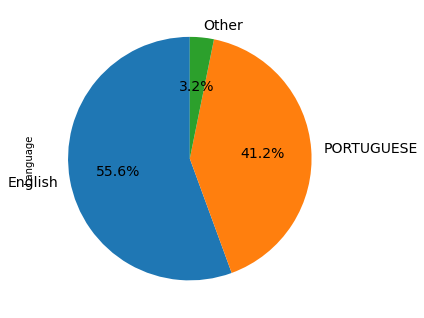

In [ ]:
# n3ml piechart lel data
# subset1 = df[df['Idiom'] == 'ENGLISH']    # Getting only English songs
# subset2 = df[df['Idiom'] == 'PORTUGUESE'] # Getting only Portuguese songs
# subset3 = df[df['Idiom'] == 'SPANISH' ]   # Getting only Spanish songs
# subset4 = df[df['Idiom'] != 'ENGLISH']    # Removing English songs
# subset4 = subset4[subset4['Idiom'] != 'PORTUGUESE'] # Removing Portuguese songs
# subset4 = subset4[subset4['Idiom'] != 'SPANISH']    # Removing Spanish songs

df_pie = pd.DataFrame({'Language': [(df['Idiom']=='ENGLISH').sum() ,  (df['Idiom']=='PORTUGUESE').sum(),
                                (df['Idiom']=='SPANISH').sum() + Others ]},
                      index=['English', 'PORTUGUESE', 'Other'])    
                  

#plot = df_pie.plot.pie(y='Language', figsize=(5, 5))


plt.figure(figsize=(12,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_pie.plot(kind='pie', y = 'Language', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14, xlabel = 'LOLOLOLOLOL')
#df.plot()

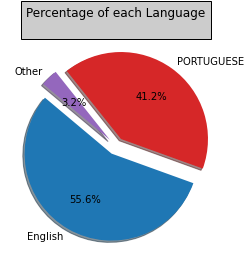

In [ ]:
languages = 'English', 'PORTUGUESE', 'Other'
popuratity = [(df['Idiom']=='ENGLISH').sum(), (df['Idiom']=='PORTUGUESE').sum(), (df['Idiom']=='SPANISH').sum() + Others ]
# The number of songs in each language

colors = ["#1f77b4",  "#d62728", "#9467bd"]
# explode graph
explode = (0.1, 0.1, 0.1)  
# Plot
plt.pie(popuratity, explode=explode, labels=languages, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of each Language\n", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
# Checking for duplicated values
df.duplicated().sum()
# around 20% of data is duplicated

43253

In [ ]:
# take only english songs, to facilitate predictions
df2 = df[df['Idiom']=='ENGLISH']

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114723 entries, 0 to 209285
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Lyric   114723 non-null  object
 1   Idiom   114723 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [ ]:
df2.duplicated().sum()
# We need to drop duplicates

23927

In [ ]:
df2 = df2.drop_duplicates()
df2.duplicated().sum()
# No more duplicate values

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90796 entries, 0 to 209285
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lyric   90796 non-null  object
 1   Idiom   90796 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [ ]:
# shape
df2.shape

(90796, 3)

In [ ]:
# Adding a column containing number of words of a song
# First,we split the song text into words, then count the number
# of words (length of string)
df2['Number_of_words'] = df2['Lyric'].apply(lambda x:len(str(x).split()))
df2.head()

,Lyric,Idiom,Number_of_words
0,I could feel at the time. There was no way of ...,ENGLISH,145
1,"Take me now, baby, here as I am. Hold me close...",ENGLISH,238
2,These are. These are days you'll remember. Nev...,ENGLISH,172
3,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,263
4,Trudging slowly over wet sand. Back to the ben...,ENGLISH,118


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90796 entries, 0 to 209285
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Lyric            90796 non-null  object
 1   Idiom            90796 non-null  object
 2   Number_of_words  90796 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
word_list = list()
sentences = df2['Lyric'].astype(str).str.lower()
for sentence in sentences:
    for word in sentence.split():
        word_list.append(word)
len(word_list)
# there are 24,991,955 words (if we use all dataset)          [CRASHED]
# but now there are 449,129 words (from the first 2000 rows)  [CRASHED]
# but now there are 236,685 words (from the first 1000 rows)  [CRASHED]
# but now there are 125,786 words (from the first 500 rows)   [CRASHED]
# but now there are  18,387 words (from the first 100 rows)   [CRASHED]

24991955

In [ ]:
# Getting the count of each word, but this runs out of memory if
# applied to the whole dataset

# word_list_np = np.array(word_list)
# #word_list_np.value_counts()

# # creating a list of column names
# column_values = ['Words']
  
# # creating the dataframe
# df3 = pd.DataFrame(data = word_list_np,  
#                   columns = ['Words'])
# df3['Words'].value_counts()
# # The most common word is 'the'

### Frequency distribution of number of words

In [ ]:
# statistical info
df2.describe()
# On average, a song has around 250 words

,Number_of_words
count,90796.000000
mean,275.253921
std,169.144457
min,1.000000
25%,163.000000
50%,232.000000
75%,337.000000
max,3301.000000


In [ ]:
from scipy.stats import skew

1.8899999694751943


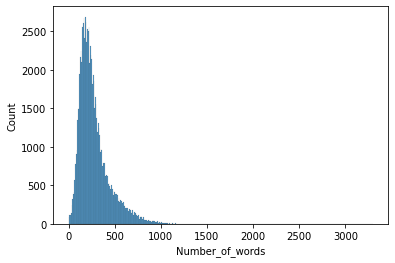

In [ ]:
print(skew(df2['Number_of_words']))
sns.histplot(df2['Number_of_words'])
# The data is right-skewed

In [9]:
def get_wordcloud(documents):
    
    #Given a set of texts, plot the wordcoud containing the most common words
    
    text = "".join(str(c) for c in documents)
    wc = WordCloud(background_color="white", max_words=2000,
                   stopwords=STOPWORDS, max_font_size=100,
                   random_state=42, width=500, height=500)
    wc.generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

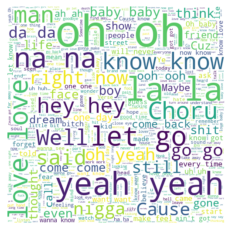

In [12]:
# Getting the word cloud of English songs
df4 = df[df['Idiom']=='ENGLISH']
get_wordcloud(df4['Lyric'])

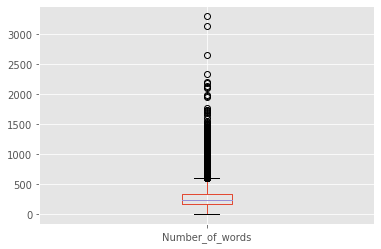

In [ ]:
# Checking outliers
df2.plot(kind = "box" , subplots = True , figsize = (6,4) )
plt.show()
# nsheel elly fo2 el 800 mthln?

# Tokenization

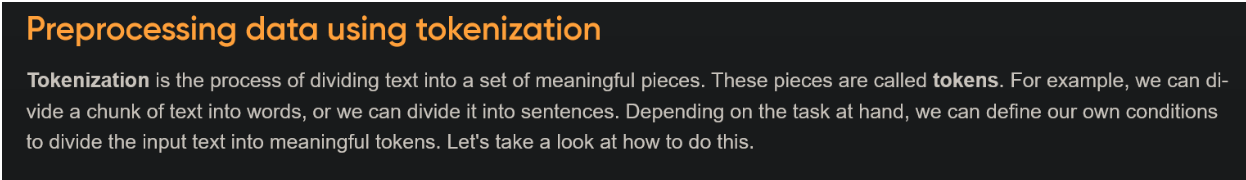

# Padding

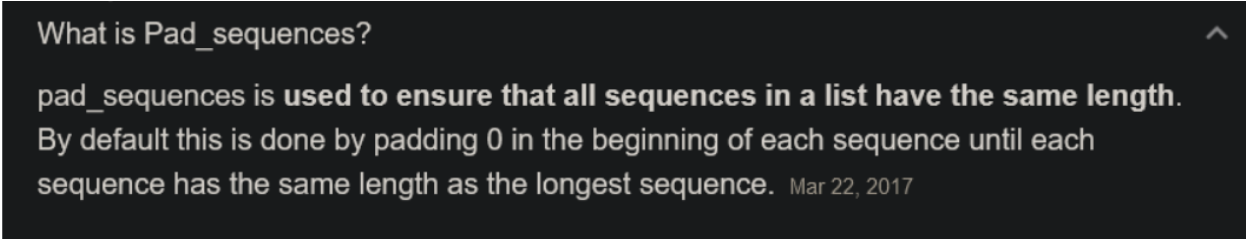

# N-gram Sequence

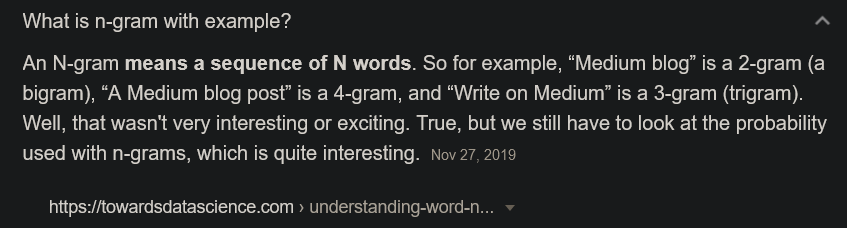

# Bidirectional

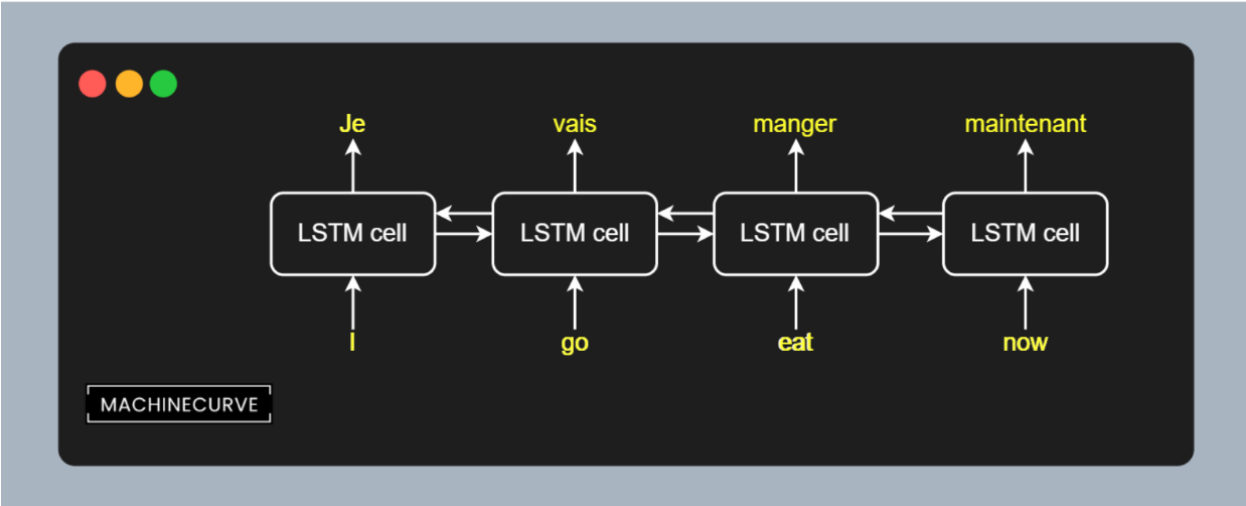

# ReduceLROnPlateau
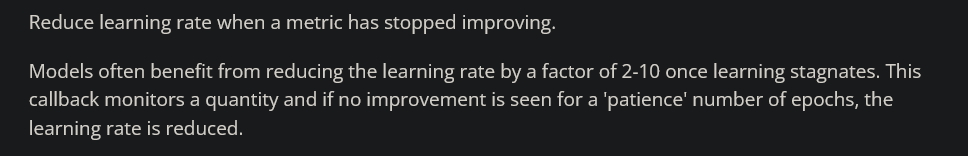